# __Plot location of extracted grid points and sections__

* ```Purpose :```  Plot location of some extracted gridpoints and sections on top of a North Atlantic map of the time-averaged Ensemble spread of 5-d SSH (detrended).

* ```Author  :``` stephanie.leroux@ocean-next.fr

* ```Date    :``` jul 2018
    
* ```Notes   :```
    - You can use this notebook with the example data file from there (opendap, 2 Mo): https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/catalog/meomopendap/extract/CMEMS_GLO-HR/SUBREG_NATL/catalog.html 
    - This example files contains the time-averaged over 1960-2015 of the ensemble spread of 5-day SSH.

# Load modules

In [2]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# matplotlib plot and tools
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

%matplotlib inline 

# __ Input/Output files: parameters __

In [3]:
#--------------------------------------------------------------------------
#--- input file to read

# input directory
diri = "/mnt/meom/workdir/lerouste/OCCIPUT/ORCA025.L75/ORCA025.L75-OCCITENS/SUBREG_NATL/"

# input file and names
CONFIGCASE = "ORCA025.L75-OCCITENS"
prefix     = "TM.1960-2015.SUBREG.NATL."
suffix     = ".estd.5d.sshas.nc"
fili       = prefix+CONFIGCASE+suffix
varnam = "ssh"
unitna = "m"

# input file for coordinates (lat lon)
filicoords = fili


#--------------------------------------------------------------------------
#--- Plot output

# format
pltty='.png'
dpifig=300

# directory
diro = "/home/lerouste/FIGS/"
# figs are first saved  locally on the github server

#  plot file name
plto = "GPloc_TM.SSH"

# plot title
titleplt = "1960-2015"

# colormap
cm_base=plt.cm.Spectral_r  #'Spectral_r'#cm_base=my_cmap #
# min/max values for the color scale
vmin=0.0
vmax=0.25
incr=0.005

# type of plot pcolormesh True/False  
# False means contourf is used
# True means pcolormesh is used: i.e. no interpolation (you see data pixels)
pcolormesh=True

# colormap label 
labelplt="E-Std of 5-day SSH ("+unitna+")"

# __Define some plot functions__

In [3]:
def plotmap(fig1,ehonan,nav_lon,nav_lat,cm_base,vmin,vmax,incr,pcolormesh,plto,xlim=(0,10),ylim=(0,10)):

        cmap=cm_base
        cmap.set_bad('white',1.)
        cmap.set_under('white',1.)
        cmap.set_over('black',1.)
        
        pj = ccrs.PlateCarree()
        ax = plt.axes(projection=pj)
        ax.outline_patch.set_edgecolor('white')
        #ax.coastlines(resolution="10m")

        gl = ax.gridlines(crs=pj, draw_labels=True,
                      linewidth=1, color='black', alpha=0.2, linestyle='--')

        label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

        gl.xlabel_style = label_style
        gl.xlabels_bottom = False
        gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20,dtype=float))

        gl.ylabel_style = label_style
        gl.ylabels_right = False
        gl.ylocator = mticker.FixedLocator(np.arange(-90,90,20,dtype=float))

        if pcolormesh:
            plto=plto+".comesh"
            cs = plt.pcolormesh(nav_lon, nav_lat, ehonan,transform=pj,cmap=cmap,vmin=vmin,vmax=vmax)
        else:
            cs = plt.contourf(nav_lon, nav_lat, ehonan,transform=pj,cmap=cmap,levels=np.arange(vmin,vmax+incr,incr),extend='both')

        # limits and ticks
        plt.xlim(xlim)
        plt.ylim(ylim) 

        #colorbar
        cb = plt.colorbar(cs, extend='both', fraction=0.042, pad=0.04, orientation="horizontal")
        cb.ax.tick_params(labelsize=15) 
        cb.set_label(labelplt,size=15)
        return 

## Define gridpoints to plot on map

In [4]:
xgp    = [-45.,-45.,-45.]
ygp    = [35.,25.,5.]
GPlist = ['35N','25N','5N']

## Define sections to plot on map

In [5]:
# zonal sections
ysecz     = [35.,25.,5.]
labelsecz = []  # not used yet (to be implemented later if needed)

# meridional sections
xsecm     = [-45.]
labelsecm = []  # not used yet (to be implemented later if needed)

## Read data

In [7]:
ssha    = xr.open_dataset(diri+fili)[varnam]
nav_lon = xr.open_dataset(diri+filicoords)["nav_lon"]
nav_lat = xr.open_dataset(diri+filicoords)["nav_lat"]

# plot map

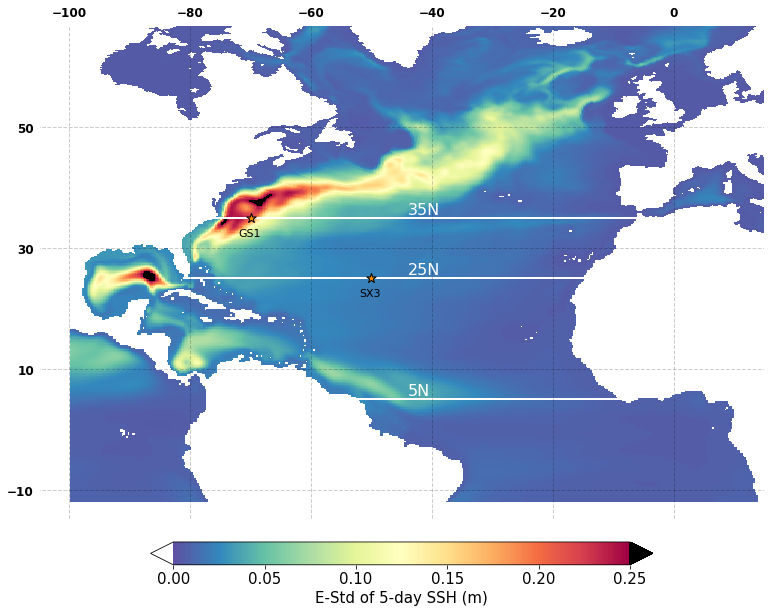

In [8]:
# data to plot (2-d array)
data2plot  = ssha[0,:,:]


#------ START PLOTTING-----------------------------------------------------------------------
# create fig
fig1 = plt.figure(figsize=([13,10]),facecolor='white')

# plot data (base plot)
plotmap(fig1,data2plot,nav_lon,nav_lat,cm_base=cm_base,vmin=vmin,vmax=vmax,incr=incr,pcolormesh=pcolormesh,plto=plto,xlim=(-105,15.),ylim=(-15.,67.))

# add title in the graph
#plt.annotate(titleplt,xy=(-98, 42), xycoords='data', color='k',size=18)

# add lines for zonal and meridional sections

plt.axhline(y=35,xmin=0, xmax=0.85,zorder=1,color="white",linewidth=2.)
plt.axhline(y=25,xmin=0.2, xmax=1,zorder=1,color="white",linewidth=2.)
plt.axhline(y=5,xmin=0.4, xmax=0.8,zorder=1,color="white",linewidth=2.)


# add symbols for gridpoints
plt.scatter([-70.,-50.], [35.,25.],s=100, c="darkorange", alpha=1., marker='*',edgecolors='k',zorder=10)
plt.annotate("GS1",xy=(-72.,32), xycoords='data', color='k',size=11)
plt.annotate("SX3",xy=(-52.,22), xycoords='data', color='k',size=11)

# add annotations for gridpoints
countgp=-1
for GPLOC in GPlist:
    countgp=countgp+1
    if (countgp==0):
        plt.annotate(GPLOC,xy=(xgp[countgp]+1., ygp[countgp]+0.6), xycoords='data', color='w',size=16)
    else:
        plt.annotate(GPLOC,xy=(xgp[countgp]+1., ygp[countgp]+0.6), xycoords='data', color='w',size=16)

        
plt.show()


# Save fig in png, resolution dpi
fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

plt.close(fig1)       